# Triangle Wave Generator
A *triangle wave* is a periodic waveform that starts at an initial value, ramps up to a maximum value, ramps down to the initial value, and repeats.

Here's an example triangle wave that is generated using a simple Python function.

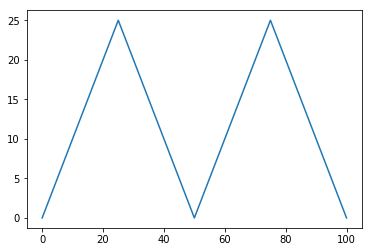

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(0, 101)

def tri(x):
    res = x % 50
    if res < 25:
        return res
    else:
        return 50 - res

plt.plot(x, list(map(tri, x)))

In [ ]:
import magma as m
m.set_mantle_target("ice40")
from loam.boards.icestick import IceStick

N = 8

icestick = IceStick()
# TODO: Configure Parts (Clock and GPIO)

In [ ]:
import mantle

main = icestick.main()
# TODO: Define main
m.EndDefine()

In [ ]:
m.compile('build/triangle', main)

In [ ]:
%%bash
cd build
cat triangle.pcf
yosys -q -p 'synth_ice40 -top main -blif triangle.blif' triangle.v
arachne-pnr -q -d 1k -o triangle.txt -p triangle.pcf triangle.blif 
icepack triangle.txt triangle.bin
iceprog triangle.bin

We can wire up the GPIO pins to a logic analyzer to verify that our circuit produces the correct triangle waveform.

![](images/triangle.png)

We can use Saleae's [export data](https://support.saleae.com/hc/en-us/articles/115005986806-Saving-Loading-and-Exporting-Data) feature to output a [csv file](data/triangle-capture.csv) and load this data into Python to plot the results. Here we provide an example `.csv`, replace it with yours to check that the output you're producing is correct.

In [2]:
import csv
import magma as m
with open("data/triangle-capture.csv") as triangle_capture_csv:
    csv_reader = csv.reader(triangle_capture_csv)
    next(csv_reader, None)  # skip the headers
    rows = [row for row in csv_reader]
timestamps = [float(row[0]) for row in rows]
values = [m.bitutils.seq2int(tuple(int(x) for x in row[1:])) for row in rows]

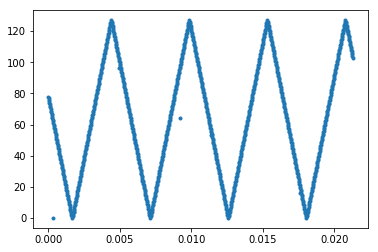

In [5]:
import matplotlib.pyplot as plt
plt.plot(timestamps[:1000], values[:1000], ".")